# Demostración del Flujo de Trabajo AAO/BRPC

Este notebook demuestra la ejecución ordenada y óptima del pipeline de análisis de datos para el dataset de compañías polacas en bancarrota.

## Pasos del Pipeline:
1.  **Carga de Datos**: Lectura del dataset.
2.  **Análisis Exploratorio (EDA)**: Revisión de calidad de datos.
3.  **Visualización de Distribuciones**: Histogramas y Boxplots iniciales.
4.  **Visualización de Relaciones**: Scatter plots de variables clave.
5.  **Análisis de Candidatos**: Evaluación de varianza y correlación inicial.
6.  **Procesado de Datos**: Limpieza, imputación y tratamiento de outliers.
7.  **Ingeniería de Características**: Binning óptimo y cálculo de IV/WoE.
8.  **Agrupamiento de Variables**: Uso de VarClusHi para detectar multicolinealidad.
9.  **Selección de Características**: Selección de representantes y mejores K variables.
10. **Reducción de Dimensionalidad**: PCA y visualización 2D/3D.

In [1]:

import pandas as pd
import numpy as np
import sys
import os
import plotly.express as px

# Agregar el directorio actual al path para importar módulos locales
# Esto permite importar 'BRPC' como un paquete ya que estamos dentro de 'AAO'
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# Importar módulos del paquete BRPC (estamos dentro de AAO)
from BRPC.analisis_dataset import analisis_dataset
from BRPC.procesado_dataset import procesado_dataset
from BRPC.agrupamiento_optimo import agrupamiento_optimo
from BRPC.woe_iv import woe_iv
from BRPC.varclushi_analisis import varclushi_analisis
from BRPC.feature_selection import seleccionar_representantes_clustervers
from BRPC.select_mejor_k import select_mejor_k
from BRPC.pca_analisis import pca_analisis
from BRPC.candidatos_analizados import candidatos_analizados

# Importar módulos de visualización
from BRPC.plots.vis_histogram import plot_histograms
from BRPC.plots.vis_boxplot import plot_boxplots
from BRPC.plots.vis_pca_2d_cufflinks import plot_pca_2d_cufflinks
from BRPC.plots.vis_pca_3d_cufflinks import plot_pca_3d_cufflinks
from BRPC.plots.vis_scatter import plot_scatter

## 1. Carga de Datos

In [2]:
try:
    # Ajustamos la ruta para salir de AAO e ir a dataset
    df = pd.read_csv('../dataset/bankruptcy_polish_companies.csv')
    print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: No se encontró el archivo '../dataset/bankruptcy_polish_companies.csv'.")

Dataset cargado exitosamente. Dimensiones: (43405, 66)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## 2. Análisis Exploratorio de Datos (EDA)
Utilizamos `analisis_dataset` para inspeccionar la calidad de los datos, nulos y tipos.

In [3]:
eda_summary = analisis_dataset(df)
print("Resumen del Análisis de Datos:")
display(eda_summary.head(10))  # Mostramos las primeras 10 filas para brevedad

Resumen del Análisis de Datos:


,Null Count,Completeness (%),Data Type,Std,Variance,Type
Column,,,,,,
year,0,100.00,int64,1.2840,1.648600e+00,Discreta
A1,8,99.98,float64,2.9941,8.964700e+00,Continua
A2,8,99.98,float64,5.8427,3.413770e+01,Continua
A3,8,99.98,float64,5.4394,2.958740e+01,Continua
A4,134,99.69,float64,295.4344,8.728150e+04,Continua
A5,89,99.79,float64,61227.9683,3.748864e+09,Continua
A6,8,99.98,float64,7.2013,5.185910e+01,Continua
A7,8,99.98,float64,5.7131,3.263920e+01,Continua
A8,94,99.78,float64,505.8943,2.559290e+05,Continua


## 3. Visualización de Distribuciones
Visualizamos las distribuciones de las primeras variables numéricas para entender su comportamiento inicial.

Generando histogramas para las primeras variables...
Nota: Se graficarán solo las primeras 5 columnas numéricas por defecto.


C:\Users\cuca0\AppData\Local\Temp\ipykernel_15640\559696517.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_hist.show()



Generando boxplots para detectar outliers...
Nota: Se graficarán solo las primeras 5 columnas numéricas por defecto.


C:\Users\cuca0\AppData\Local\Temp\ipykernel_15640\559696517.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax_box.figure.show()


<Figure size 1200x800 with 0 Axes>

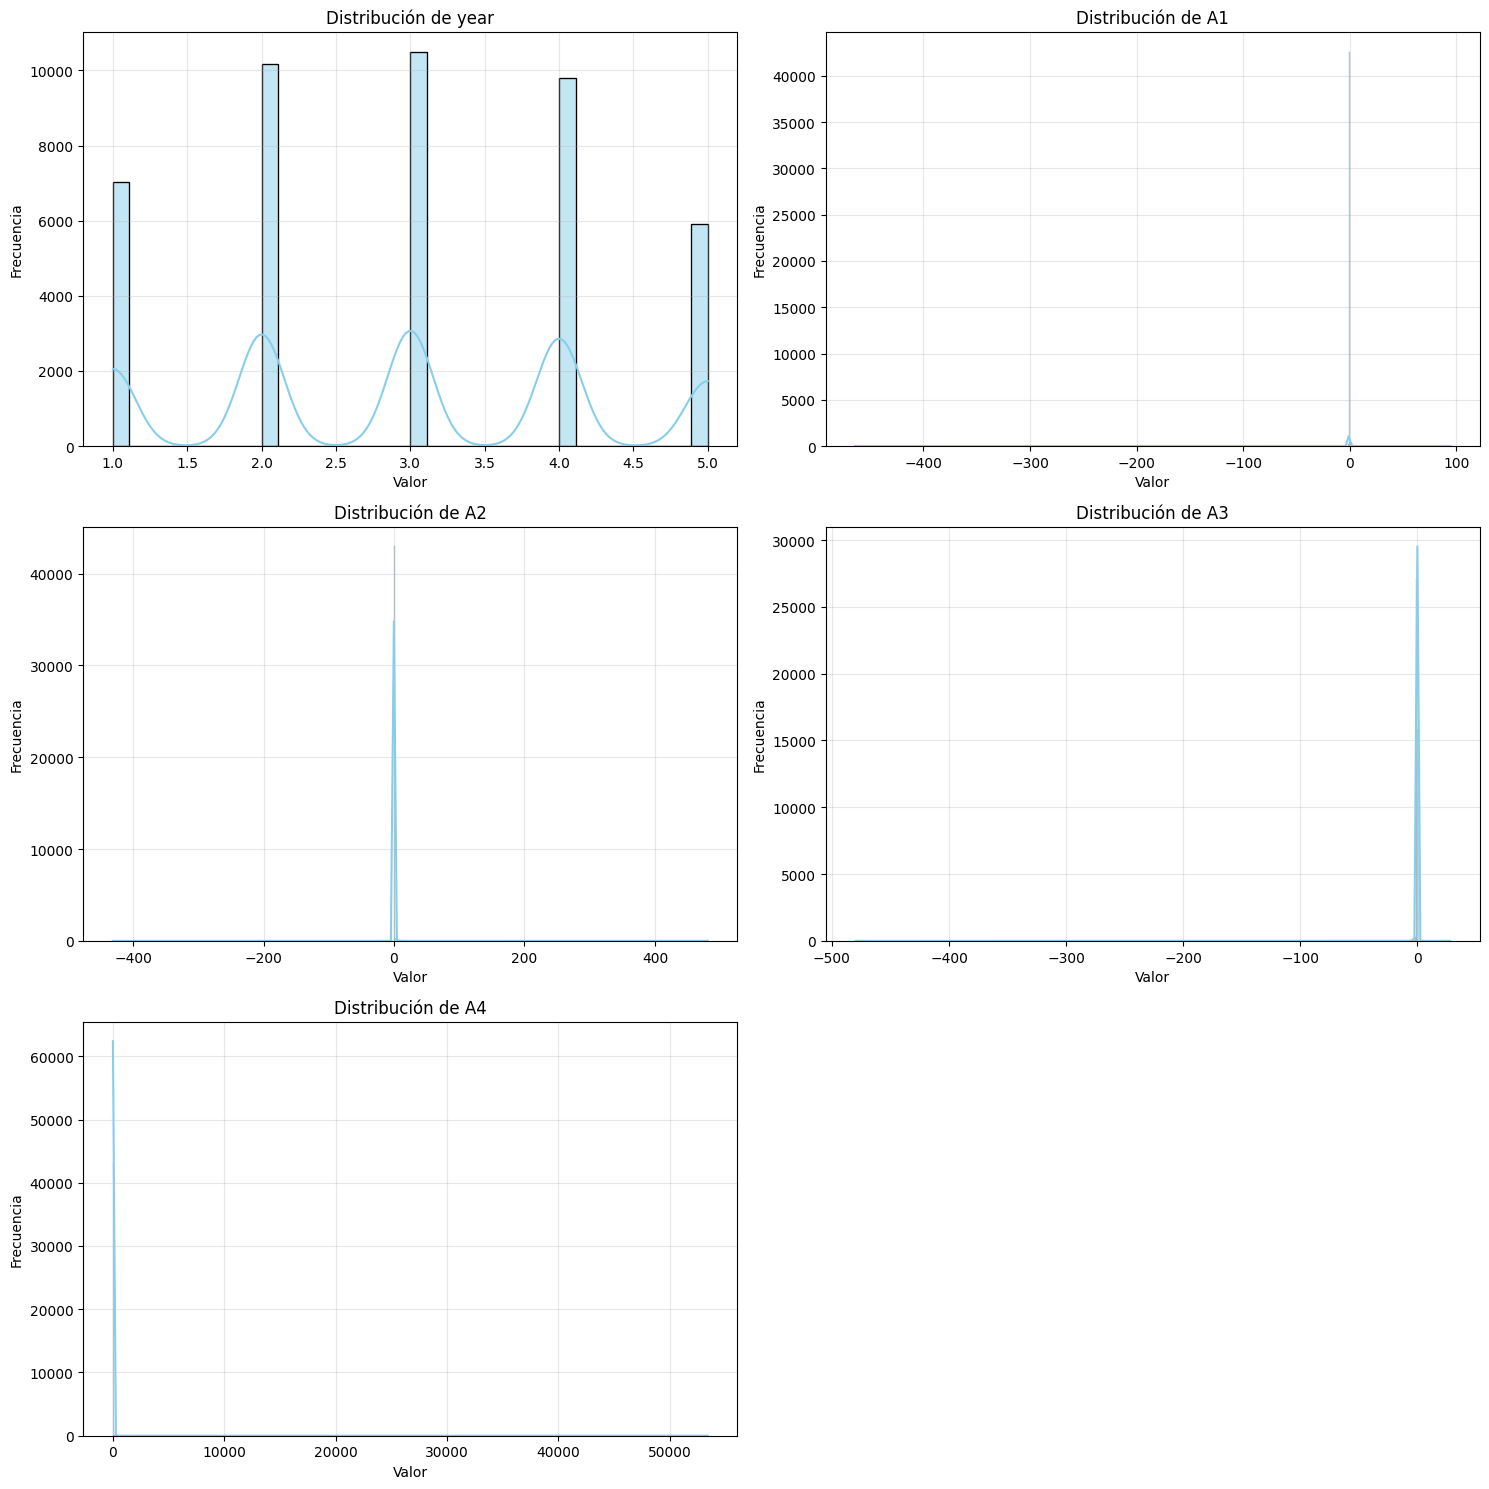

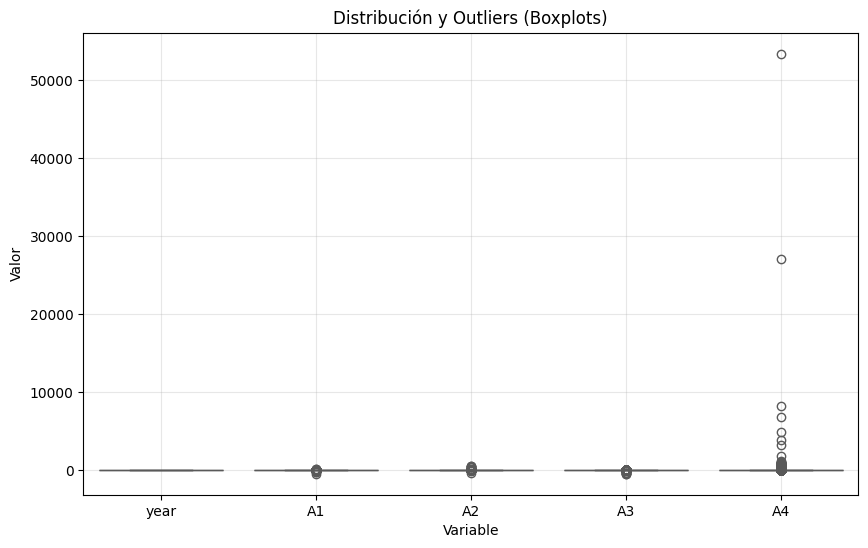

In [4]:
print("Generando histogramas para las primeras variables...")
fig_hist = plot_histograms(df)
if fig_hist:
    fig_hist.show()

print("\nGenerando boxplots para detectar outliers...")
ax_box = plot_boxplots(df)
if ax_box:
    # Seaborn devuelve un Axes, necesitamos mostrar la figura
    ax_box.figure.show()

## 4. Visualización de Relaciones
Exploramos relaciones entre variables numéricas usando Scatter Plots.

Generando Scatter Plot entre year y A1...


C:\Users\cuca0\AppData\Local\Temp\ipykernel_15640\3469052944.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax_scatter.figure.show()


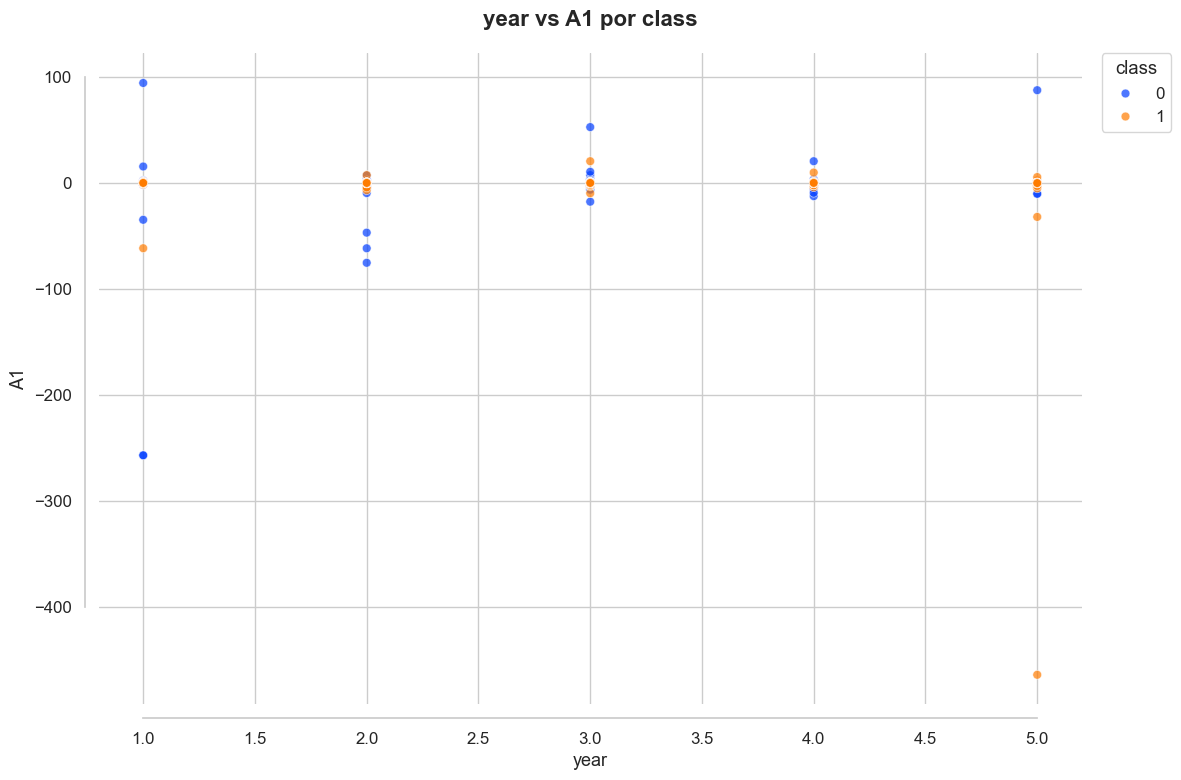

In [5]:
# Seleccionamos dos variables numéricas arbitrarias para el ejemplo
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) >= 2:
    x_col = numeric_cols[0]
    y_col = numeric_cols[1]
    print(f"Generando Scatter Plot entre {x_col} y {y_col}...")
    
    # Usamos 'class' como hue si existe, si no, sin hue
    hue_col = 'class' if 'class' in df.columns else None
    
    ax_scatter = plot_scatter(df, x_col, y_col, hue=hue_col)
    if ax_scatter:
        ax_scatter.figure.show()
else:
    print("No hay suficientes variables numéricas para generar un scatter plot.")

## 5. Análisis de Candidatos
Evaluamos variables con baja varianza y alta correlación usando `candidatos_analizados`.

In [6]:
print("Ejecutando análisis de candidatos (Varianza y Correlación)...")
candidatos_analizados(df)

Ejecutando análisis de candidatos (Varianza y Correlación)...
Analyzing 4 numeric features...

Features with very low variance (< 0.01): 0
Series([], dtype: float64)

Features with correlation > 0.9: 2
['Completeness (%)', 'Variance']

Top 10 correlated pairs:
Null Count        Completeness (%)    1.000000
Std               Variance            0.958654
Completeness (%)  Variance            0.055352
Null Count        Variance            0.055256
Completeness (%)  Std                 0.038912
Null Count        Std                 0.038818
dtype: float64


## 6. Procesado de Datos
Limpiamos el dataset imputando nulos y tratando outliers con `procesado_dataset`.

In [7]:
df_processed = procesado_dataset(df)
print(f"Dimensiones del dataset procesado: {df_processed.shape}")

# Verificar que no queden nulos
print(f"Total de nulos restantes: {df_processed.isnull().sum().sum()}")

Eliminando columnas con > 20% nulos: ['A37']


d:\Practicas\Practica4_Equipo2\AAO\BRPC\procesado_dataset.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
d:\Practicas\Practica4_Equipo2\AAO\BRPC\procesado_dataset.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Dimensiones del dataset procesado: (43405, 65)
Total de nulos restantes: 0


## 7. Ingeniería de Características (Binning & IV/WoE)
Calculamos el Information Value (IV) para cada variable numérica. Para ello, primero discretizamos la variable usando `agrupamiento_optimo`.

In [8]:
target_col = 'class'
feature_cols = [col for col in df_processed.columns if col != target_col and col != 'year' and col != 'id']

iv_results = []
df_binned = df_processed.copy()

print("Calculando IV para las variables (esto puede tardar un poco)...")

for col in feature_cols:
    try:
        # 1. Binning Óptimo
        df_binned[col] = agrupamiento_optimo(df_processed, col, target_col)
        
        # 2. Calcular IV y WoE
        _, iv = woe_iv(df_binned, col, target_col)
        iv_results.append({'Feature': col, 'IV': iv})
    except Exception as e:
        print(f"Error procesando {col}: {e}")

df_iv = pd.DataFrame(iv_results).sort_values(by='IV', ascending=False)

print("\nTop 10 Variables por Information Value (IV):")
display(df_iv.head(10))

Calculando IV para las variables (esto puede tardar un poco)...

Top 10 Variables por Information Value (IV):


,Feature,IV
26,A27,1.186781
25,A26,0.667414
39,A41,0.658837
15,A16,0.657094
14,A15,0.656792
23,A24,0.632875
12,A13,0.621293
40,A42,0.592320
44,A46,0.575477
11,A12,0.537461


## 8. Agrupamiento de Variables (VarClusHi)
Utilizamos el algoritmo VarClusHi para agrupar variables altamente correlacionadas y reducir la redundancia.

In [9]:
# Usamos el dataset procesado (numérico) para el clustering
print("Ejecutando VarClusHi...")
rsquare_df = varclushi_analisis(df_processed)

print("\nResultados de VarClusHi (Primeras filas):")
display(rsquare_df.head())

Ejecutando VarClusHi...
Excluyendo columnas no-feature: ['class', 'year']
Ejecutando VarClusHi con 63 variables...

Resultados de VarClusHi (Primeras filas):


,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,A1,0.908332,0.750650,0.367627
1,0,A7,0.932567,0.748114,0.267713
2,0,A11,0.912646,0.696440,0.287765
3,0,A14,0.932741,0.748231,0.267147
4,0,A18,0.932690,0.748135,0.267248


## 9. Selección de Características
Primero seleccionamos el mejor representante de cada clúster y luego aplicamos `SelectKBest` para obtener las mejores variables globales.

In [10]:
# 1. Seleccionar representantes de clústeres
selected_representatives = seleccionar_representantes_clustervers(rsquare_df)
print(f"Se seleccionaron {len(selected_representatives)} representantes de clústeres:")
print(selected_representatives)

# 2. Seleccionar las mejores K variables de estos representantes
X_reps = df_processed[selected_representatives]
y = df_processed[target_col]

print("\nSeleccionando las mejores 7 variables con SelectKBest...")
X_final = select_mejor_k(X_reps, y, k=7)
final_features = X_final.columns.tolist()

print(f"\nVariables Finales Seleccionadas: {final_features}")

Se seleccionaron 12 representantes de clústeres:
['A22', 'A2', 'A20', 'A52', 'A54', 'A13', 'A15', 'A61', 'A29', 'A36', 'A46', 'A6']

Seleccionando las mejores 7 variables con SelectKBest...
Se han seleccionado las siguientes 7 variables usando f_classif:
 - A22
 - A2
 - A52
 - A54
 - A13
 - A46
 - A6

Variables Finales Seleccionadas: ['A22', 'A2', 'A52', 'A54', 'A13', 'A46', 'A6']


## 10. Reducción de Dimensionalidad (PCA)
Aplicamos PCA sobre las variables finales seleccionadas y visualizamos usando las funciones de `BRPC.plots`.

In [11]:
# Aplicar PCA
df_pca, pca_model, explained_var = pca_analisis(df_processed[final_features], n_components=3)

print(f"Varianza Explicada por componente: {explained_var}")
print(f"Varianza Total Explicada: {sum(explained_var):.4f}")



Dimensiones del dataset antes de PCA: (43405, 7) (Filas, Columnas)
Dimensiones del dataset después de PCA: (43405, 3) (Filas, Componentes)
Reducción: 7 variables -> 3 componentes
Varianza Explicada por componente: [0.45860021 0.17609191 0.11637573]
Varianza Total Explicada: 0.7511


### Visualización PCA
Visualizamos los resultados del PCA usando gráficos 2D y 3D interactivos.

In [12]:
# Agregar la columna 'class' al DataFrame PCA para colorear los puntos
df_pca_viz = df_pca.copy()
df_pca_viz['class'] = df['class'].values

# Visualización PCA 2D
print("Generando visualización PCA 2D...")
fig_2d = plot_pca_2d_cufflinks(
    df_pca=df_pca_viz,
    hue='class',
    explained_variance=explained_var[:2]  # Solo los primeros 2 componentes
)
fig_2d.show()

Generando visualización PCA 2D...


In [13]:
# Visualización PCA 3D
print("Generando visualización PCA 3D...")
fig_3d = plot_pca_3d_cufflinks(
    df_pca=df_pca_viz,
    hue='class',
    explained_variance=explained_var  # Los 3 componentes
)
fig_3d.show()

Generando visualización PCA 3D...
